In [1]:
#ref:https://towardsdatascience.com/predictive-customer-analytics-part-iv-ab15843c8c63

In [1]:
path="https://raw.githubusercontent.com/RyanSydney/PredictiveCustomerAnalytics/master/issues.csv"

In [2]:
%matplotlib inline
 
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics
 
raw_data = pd.read_csv(path)
raw_data.dtypes

PROBLEM_TYPE             object
COUNT                     int64
AVG_CALLS_TO_RESOLVE    float64
AVG_RESOLUTION_TIME       int64
REOCCUR_RATE            float64
REPLACEMENT_RATE        float64
dtype: object

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

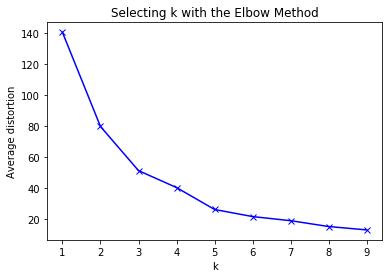

In [3]:
clust_data = raw_data.drop("PROBLEM_TYPE",axis=1)
 
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
 
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clust_data)
    prediction=model.predict(clust_data)
    meanDistortions.append(sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0])
 
#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [4]:
#Optimal clusters is 3
final_model=KMeans(3)
final_model.fit(clust_data)
prediction=final_model.predict(clust_data)
 
#Join predicted clusters back to raw data
raw_data['GROUP'] = prediction
print("Groups Assigned : \n")
raw_data[["GROUP","PROBLEM_TYPE"]]


Groups Assigned : 



,GROUP,PROBLEM_TYPE
0,0,Admin Password Lost
1,0,Windows Reboots automatically
2,0,System not coming up after reboot
3,2,Slow system
4,1,Internet Connectivity loss
5,0,New Installation hangs
6,0,Intermittent Blank Screen
7,2,Too many popups in Browser
8,2,Cannot find printer
9,0,Missing peripheral driver


In [15]:
raw_data.head()

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE,GROUP
0,Admin Password Lost,45,2.3,54,0.15,0.00,0
1,Windows Reboots automatically,47,3.1,132,0.30,0.03,0
2,System not coming up after reboot,12,4.0,154,0.02,0.05,0
3,Slow system,165,1.2,32,0.03,0.00,2
4,Internet Connectivity loss,321,1.0,5,0.21,0.00,1


/Users/sulbha/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1bcd5c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bcde438>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bcdea20>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bcc1630>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1bcd5dd8>,
  <matplotlib.lines.Line2D at 0x1a1bd53b70>]}

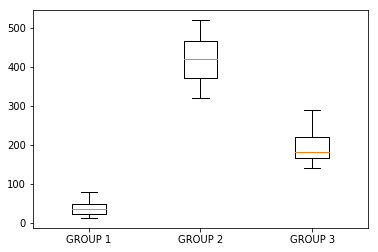

In [26]:
plt.cla()
plt.boxplot([raw_data["COUNT"][raw_data.GROUP==0],
             raw_data["COUNT"][raw_data.GROUP==1],
              raw_data["COUNT"][raw_data.GROUP==2]],
           labels=('GROUP 1','GROUP 2','GROUP 3'))

/Users/sulbha/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1bdae320>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bdaeb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bdb8518>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bdb81d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1bdae470>,
  <matplotlib.lines.Line2D at 0x1a1bdcc668>]}

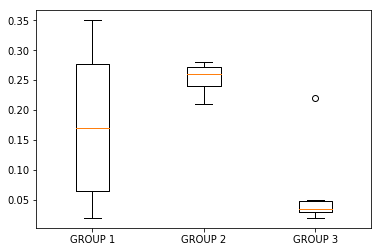

In [27]:
plt.boxplot([raw_data["REOCCUR_RATE"][raw_data.GROUP==0],
             raw_data["REOCCUR_RATE"][raw_data.GROUP==1],
             raw_data["REOCCUR_RATE"][raw_data.GROUP==2]],
           labels=('GROUP 1','GROUP 2','GROUP 3'))

/Users/sulbha/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1bfb3f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bfbb748>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bfbbd30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bf3e898>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1bfbb0b8>,
  <matplotlib.lines.Line2D at 0x1a1bfcee80>]}

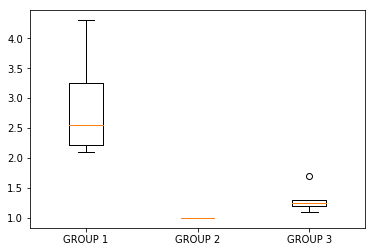

In [29]:
#Now for Avg. Calls to resolve
plt.cla()
plt.boxplot([raw_data["AVG_CALLS_TO_RESOLVE"][raw_data.GROUP==0],
             raw_data["AVG_CALLS_TO_RESOLVE"][raw_data.GROUP==1],
             raw_data["AVG_CALLS_TO_RESOLVE"][raw_data.GROUP==2]],
           labels=('GROUP 1','GROUP 2','GROUP 3'))

/Users/sulbha/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x1a1befa3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1befaeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bef48d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bef4588>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b910f60>,
  <matplotlib.lines.Line2D at 0x1a1c026a20>]}

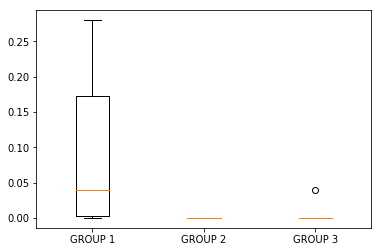

In [31]:
plt.cla()
plt.boxplot([raw_data["REPLACEMENT_RATE"][raw_data.GROUP==0],
             raw_data["REPLACEMENT_RATE"][raw_data.GROUP==1],
             raw_data["REPLACEMENT_RATE"][raw_data.GROUP==2]],
           labels=('GROUP 1','GROUP 2','GROUP 3'))